## THE MOORE - PENROSE PSEUDOINVERSE

### BY: KEVIN JOSEPH SCARIA & BEN JACOB SCARIA

* A system of equations can be expressed as a matrix.
* The inverse of this matrix can be used to solve the system of equations.
* It is evident from the following formula:

$AX=B$

$A^{-1}AX=A^{-1}B$

$IX =A^{-1}B$

$X=A^{-1}B$

* We know that not all matrices have an inverse. In some cases, a system of equation has no solution, and thus the inverse doesn’t exist. 
* Using the Moore-Penrose Pseudoinverse, it can be useful to find a values that is almost a solution (in term of minimizing the error). 

$***************************************************************************$

* The Moore-Penrose pseudoinverse is a direct application of the SVD - Singular Value Decomposition.
*  **Matrix decompositions are methods that reduce a matrix into constituent parts that make it easier to calculate more complex matrix operations. Matrix decomposition methods is also called as matrix factorization methods.** 
* The eigen decomposition can be done to square matrices only. But for matrices of non-sqaured shapes, singular value decomposition can be used.

$***************************************************************************$

**SINGULAR VALUE DECOMPOSITION:**
With SVD, we decompose a matrix into three other matrices, and these matrices are subtransformations of the space. Thus, instead of doing the transformation in one movement, it is done with 3 movements.

We will decompose a a matrix $A$ into 3 matrices as follows.

$A$ $=$ $U.D.V^{T}$

Where, $U$ = Left singular vectors , $D$ = Singular values, $V^{T}$ = Right singular vectors.

**The matrices U, D, and V have the following properties:**

* U and V are orthogonal matrices ($U^{T}=U^{−1} and V^{T}=V^{−1}$)

* D is a diagonal matrix (all 0 except the diagonal) However D is not necessarily square.

* The columns of U are called the left-singular vectors of A while the columns of V are the right-singular vectors of A. The values along the diagonal of D are the singular values of A.

$***************************************************************************$

In [18]:
import numpy as np
import matplotlib.pyplot as plt

##### SINGULAR VALUE DECOMPOSITION PYTHONIC IMPLEMENTATION:

Defining a function to plot the vectors on a circle.

In [48]:
def matrixToPlot(matrix, vectorsCol=['#FF9A13', '#1190FF']):
    # Unit circle
    x = np.linspace(-1, 1, 100000)
    y = np.sqrt(1-(x**2))

    # Modified unit circle (separate negative and positive parts)
    x1 = matrix[0,0]*x + matrix[0,1]*y
    y1 = matrix[1,0]*x + matrix[1,1]*y
    x1_neg = matrix[0,0]*x - matrix[0,1]*y
    y1_neg = matrix[1,0]*x - matrix[1,1]*y

    # Vectors
    u1 = [matrix[0,0],matrix[1,0]]
    v1 = [matrix[0,1],matrix[1,1]]

    plt.plot([u1[0],0],[u1[1],0])
    plt.plot([v1[0],0],[v1[1],0])
    
    plt.plot(x1, y1, 'g', alpha=0.5)
    plt.plot(x1_neg, y1_neg, 'g', alpha=0.5)

**Let's create a matrix A for transforming a unit vector .**

$$A= \begin{bmatrix} 3 & 7 \\ 5 & 2 \end{bmatrix}$$

Unit circle:


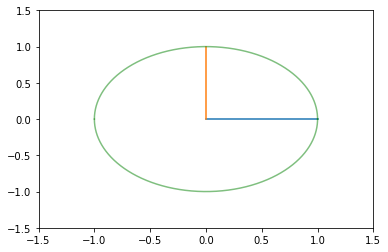

Unit circle transformed by A:


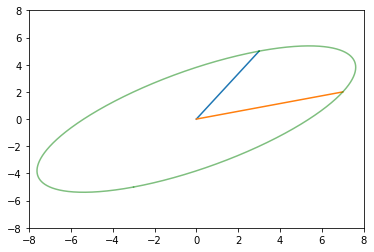

In [49]:
A = np.array([[3, 7], [5, 2]])

print('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('Unit circle transformed by A:')
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

##### Now let's compute the SVD of A:

In [51]:
U, D, V = np.linalg.svd(A)
display(U)
display(D)
display(V)

array([[-0.85065081, -0.52573111],
       [-0.52573111,  0.85065081]])

array([8.71337969, 3.32821489])

array([[-0.59455781, -0.80405286],
       [ 0.80405286, -0.59455781]])

Unit circle:


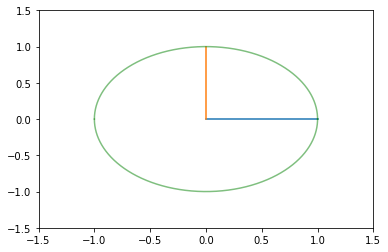

First rotation:


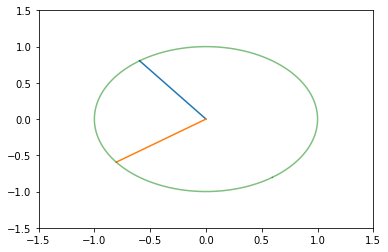

Scaling:


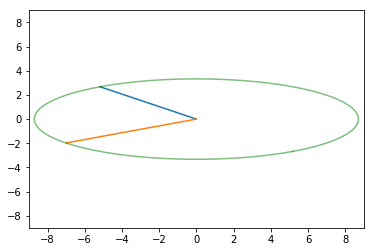

Second rotation:


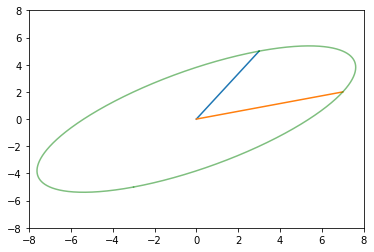

In [53]:
# Unit circle
print('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('First rotation:')
matrixToPlot(V)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('Scaling:')
matrixToPlot(np.diag(D).dot(V))
plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()

print('Second rotation:')
matrixToPlot(U.dot(np.diag(D)).dot(V))
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

$***************************************************************************$

**Using applications of SVD, the following formula can be used to find the pseudoinverse:**

## $A^{+}=VD^{+}U^{T}$

with $U$, $D$ and $V$ respectively the left singular vectors, the singular values and the right singular vectors of A. $A^{+}$ is the pseudoinverse of $A$ and $D^{+}$ is the pseudoinverse of $D$. We saw that $D$ is a diagonal matrix and thus $D^{+}$ can be calculated by taking the reciprocal of the non zero values of D.

**Let's create a non square matrix A, calculate its singular value decomposition and its pseudoinverse.**

$$A= \begin{bmatrix} 7 & 2 \\ 3 & 4 \\ 5 & 3 \end{bmatrix}$$

In [74]:
A = np.array([[7, 2], [3, 4], [5, 3]])
U, D, V = np.linalg.svd(A)  #svd calculation

D_plus = np.zeros((A.shape[0], A.shape[1])).T   #calculating the inverse of the diagonal matrix D
D_plus[:D.shape[0], :D.shape[0]] = np.linalg.inv(np.diag(D))

A_plus = V.T.dot(D_plus).dot(U.T)
A_plus

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

We can now check with the pinv() function from Numpy that the pseudoinverse is correct:

In [73]:
np.linalg.pinv(A)

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

We can now check that it is really the near inverse of A. Since we know that

$A^{−1}A=I_{n}$

with

$$I_{2}= \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

In [40]:
A_plus.dot(A)

array([[1.00000000e+00, 2.63677968e-16],
       [5.55111512e-17, 1.00000000e+00]])

#### A difference with the real inverse is that $A^{+}A≈I$ but $AA^{+}≠I$.

We can see the same below. $AA^{+}$ gives a totally different result.

In [41]:
A.dot(A_plus)

array([[ 0.83333333, -0.16666667,  0.33333333],
       [-0.16666667,  0.83333333,  0.33333333],
       [ 0.33333333,  0.33333333,  0.33333333]])

Another way of computing the pseudoinverse is to use this formula:

$A^{+}= (A^{T}A)^{−1}A^{T}$

In [42]:
A_plus_using_transpose = np.linalg.inv(A.T.dot(A)).dot(A.T)
A_plus_using_transpose

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

In this case the result is same. But in several other cases, this method is less accurate.

$***************************************************************************$

## APPLICATIONS OF PSEUDOINVERSE

## Using the pseudoinverse to solve a overdetermined system of linear equations

* In mathematics, a system of equations is considered overdetermined if there are more equations than unknowns. An overdetermined system is almost always inconsistent (it has no solution) when constructed with random coefficients.
* In general, there is no solution to overdetermined systems. In the following picture, there is no point at the intersection of the three lines corresponding to three equations:
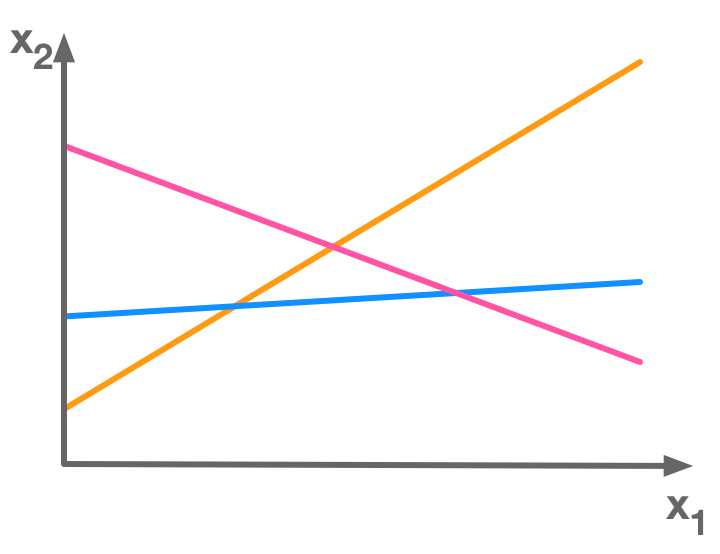

Let us consider a set of three equations with two unknowns:

$-2x_{1}+2=x_{2}$  

$4x_{1}+8=x_{2}$

$-x_{1}+2=x_{2}$

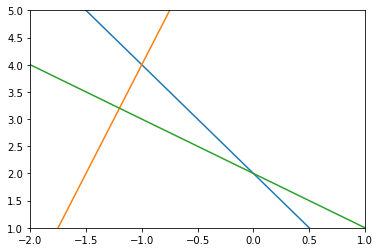

In [45]:
x1 = np.linspace(-5, 5, 1000)
x2_1 = -2*x1 + 2
x2_2 = 4*x1 + 8
x2_3 = -1*x1 + 2

plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)
plt.show()

We can see that there is no solution for the above system of equations. After rearranging the sytem of equations we get:

$-2x_{1}-x_{2}=-2$  

$4x_{1}-x_{2}=-8$

$-1x_{1}-x_{2}=-2$

Arrange them as a matrix:

$$A= \begin{bmatrix} -2 & -1 \\ 4 & -1 \\ -1 & -1 \end{bmatrix}$$   

and

$$x= \begin{bmatrix} x1 \\ x2 \end{bmatrix}$$   

and 

$$b= \begin{bmatrix} -2 \\ -8\\ -2\end{bmatrix}$$   

So we have,

$$ Ax=b <=> \begin{bmatrix} -2 & -1 \\ 4 & -1 \\ -1 & -1 \end{bmatrix} \begin{bmatrix} x1 \\ x2 \end{bmatrix} = \begin{bmatrix} -2 \\ -8\\ -2\end{bmatrix}  $$   

We will now calculate the pseudo inverse of A , $A^{+}$

In [46]:
A = np.array([[-2, -1], [4, -1], [-1, -1]])
A_plus = np.linalg.pinv(A)
A_plus

array([[-0.11290323,  0.17741935, -0.06451613],
       [-0.37096774, -0.27419355, -0.35483871]])

We can now use it to find x as we know that $x=A^{+}b$

In [47]:
b = np.array([[-2], [-8], [-2]])
ans = A_plus.dot(b)
ans

array([[-1.06451613],
       [ 3.64516129]])

Plotting this point with the equation lines

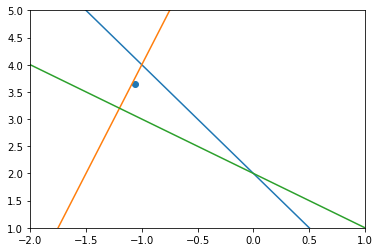

In [49]:
plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)

plt.scatter(ans[0], ans[1])

plt.show()

* The usual expectation is that the point will be at the barycenter of the triangle formed by the intersections. 
* This is not the case becase the equations are not scaled the same way. 
* **Actually the point is at the intersection of the three symmedians of the triangle.**

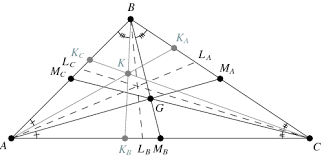

$***************************************************************************$


## This method can also be used to fit a line to a set of points. Let’s take the following data points:

We have this set of $x$ and $y$ and we are looking for the line $y=mx+c$ that minimizes the error. The error can be evaluated as the sum of the differences between the fit and the actual data points.

$-0m+1c=2$

$xm+1c=4$ 

$2m+1c=0$ 

$3m+1c=2$ 

$-3m+1c=5$ 

$4m+1c=3$ 

We can represent the data points with a matrix equations:

$$Ax=b <=> \begin{bmatrix} 0 & 1 \\ 1 & 1 \\ 2 & 1 \\ 3 & 1 \\ 3 & 1 \\ 4 & 1 \end{bmatrix} \begin{bmatrix} m \\ c \end{bmatrix} = \begin{bmatrix} 2 \\ 4 \\ 0 \\ 2 \\ 5 \\ 3 \end{bmatrix}$$

In [51]:
A = np.array([[0, 1], [1, 1], [2, 1], [3, 1], [3, 1], [4, 1]])
A

array([[0, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [3, 1],
       [4, 1]])

In [61]:
b = np.array([[2], [4], [0], [2], [5], [3]])
b

array([[2],
       [4],
       [0],
       [2],
       [5],
       [3]])

We can now calculate the pseudoinverse of A and apply it to the result to find the coefficients with the formula: $x=A^{+}b$

In [62]:
A_plus = np.linalg.pinv(A)
A_plus

array([[-2.00000000e-01, -1.07692308e-01, -1.53846154e-02,
         7.69230769e-02,  7.69230769e-02,  1.69230769e-01],
       [ 6.00000000e-01,  4.00000000e-01,  2.00000000e-01,
        -1.73472348e-17, -1.73472348e-17, -2.00000000e-01]])

In [63]:
coefs = A_plus.dot(b)
coefs

array([[0.21538462],
       [2.2       ]])

##### These are the parameters of the fit. The slope is m = 0.21538462 and the intercept is c = 2.2. We will plot the data points and the regression line:

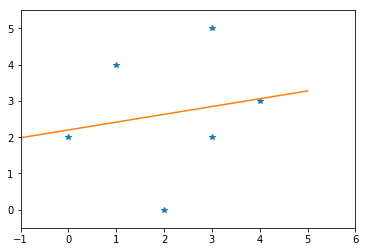

In [65]:
x = np.linspace(-1, 5, 1000)
y = coefs[0]*x + coefs[1]

plt.plot(A[:, 0], b, '*') #Plotting first column of A and B
plt.plot(x, y) #Plotting Best Fit Line
plt.xlim(-1., 6)
plt.ylim(-0.5, 5.5)
plt.show()